In this notebook we are going to analyze the apparent correlation between prada and Blackpink. We'll start by loading the tweets with mention to <i>@prada</i> and then from these count how many also contain <i>@ygofficialblink</i>.

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy.sparse import csr_matrix
from sklearn.preprocessing import LabelEncoder

from datetime import timedelta as td
from datetime import datetime

import seaborn as sns
sns.set(style='white', color_codes=True)
sns.set_context(rc={"font.family":"sans","font.size":24,"axes.titlesize":24,"axes.labelsize":24})

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
prada_path = 'Twitter_Bins/TweetPradaHashtag.csv'
prada_dataset = pd.read_csv(prada_path,encoding='utf-8')
prada_dataset

,tweet_id,user_from_id,user_from_name,user_to_id,user_to_name,mention_type
0,1229400600141582336,701592851529003009,cee5ive_,1016400573669806081,PRADAXBBY,retweet
1,1229401425706352640,2216194234,ErikaBosticco,1156866230,Prada,mention
2,1229401425706352640,2216194234,ErikaBosticco,22214453,ChiaraObscura,mention
3,1229421659905503232,857207953245581312,januszpoltorak1,27844479,BritishVogue,retweet
4,1229421659905503232,857207953245581312,januszpoltorak1,2927164554,KaiaGerber,mention
...,...,...,...,...,...,...
45592,1232413248986677248,420328856,WinningP,592100220,ArizonaMuse,retweet
45593,1232413248986677248,420328856,WinningP,1156866230,Prada,mention
45594,1232440972874698752,1219885938307825664,m97378147,27844479,BritishVogue,retweet
45595,1232440972874698752,1219885938307825664,m97378147,878204370403250176,ygofficialblink,mention


In [4]:
prada_dataset[prada_dataset['user_to_name']=='ygofficialblink'].count()

tweet_id          7433
user_from_id      7433
user_from_name    7433
user_to_id        7433
user_to_name      7433
mention_type      7433
dtype: int64

In [5]:
prada_dataset[prada_dataset['user_to_name']=='Prada'].count()

tweet_id          15108
user_from_id      15108
user_from_name    15108
user_to_id        15108
user_to_name      15108
mention_type      15108
dtype: int64

In [6]:
prada_dataset['tweet_id'].unique().shape[0]

12333

As we can already see the mentions to ygofficialblink appear in half the tweets mentioning Prada.
Let's see which are the other most mentioned users together with Prada.

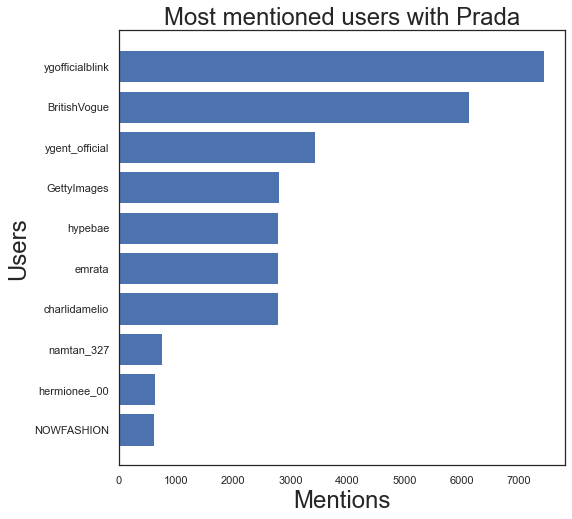

In [8]:
appearance_count = prada_dataset[prada_dataset['user_to_name']!='Prada']['user_to_name'].value_counts()[0:10]

fig = plt.figure(figsize=(8,8))
plt.barh(appearance_count.index, appearance_count, align='center')
plt.xlabel('Mentions')
plt.ylabel('Users')
plt.title('Most mentioned users with Prada')
plt.gca().invert_yaxis()

plt.savefig("prada_blackpink/Most_comentioned_Prada.png", bbox_inches='tight')

plt.show()

As we can see the users with the highest count of mentions, in tweets also mentioning Prada are the same ones that resulted as the <b>'closest ones'</b>

In order to understand this at a deeper level, let's try to give a look at the most used words, so to gather more information about the reason of such correlation.

# Analysis of the most frequent words associated with @prada

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import re
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image as im

In [11]:
prada_tweets_path = 'Twitter_Bins/Prada_tweets.csv'
prada_tweets = pd.read_csv(prada_tweets_path)
prada_tweets.head()

,id,time,created_at,from_user_name,text,filter_level,possibly_sensitive,withheld_copyright,withheld_scope,truncated,...,from_user_utcoffset,from_user_timezone,from_user_lang,from_user_tweetcount,from_user_followercount,from_user_friendcount,from_user_favourites_count,from_user_listed,from_user_withheld_scope,from_user_created_at
0,1229400600141582336,1581946918,2020-02-17 13:41:58,cee5ive_,RT @PRADAXBBY: tommy hilfiger and zendaya at t...,low,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,42497,2721,1108,59562,8,NaN,2016-02-22 02:22:25
1,1229401425706352640,1581947115,2020-02-17 13:45:15,ErikaBosticco,@prada @chiaraobscura 🖤 #shoes #details #lond...,low,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,14085,1514,1762,1548,175,NaN,2013-12-09 18:44:44
2,1229421659905503232,1581951939,2020-02-17 15:05:39,januszpoltorak1,"RT @BritishVogue: “Genuinely, Kurt Cobain was ...",low,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,11666,2,66,11655,6,NaN,2017-04-26 12:21:17
3,1229634838723878912,1582002765,2020-02-18 05:12:45,hermionee_00,3 worldwide trends #BenvenutaLalisa #LISA #LAL...,low,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,20065,1812,291,30823,4,NaN,2016-05-29 02:07:34
4,1229635019670466560,1582002808,2020-02-18 05:13:28,IsmiWitwit,RT @hermionee_00: 3 worldwide trends #Benvenut...,low,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,108861,257,665,198011,0,NaN,2017-03-26 14:12:31


In [12]:
prada_tweets_text = prada_tweets['text']
raw_string = ''.join(prada_tweets_text)
no_links = re.sub(r'http\S+', '', raw_string)
no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)


In [13]:
prada_words = no_special_characters.split(" ")
prada_words = [w for w in prada_words if len(w) > 2]  # ignore a, an, be, ...
prada_words = [w.lower() for w in prada_words]
prada_words = [w for w in prada_words if w not in STOPWORDS]

In [14]:
prada_word_count = pd.Series(prada_words).value_counts()

In [15]:
prada_wc = WordCloud(background_color="white", max_words=100, width=600, height=250).generate_from_frequencies(prada_word_count)

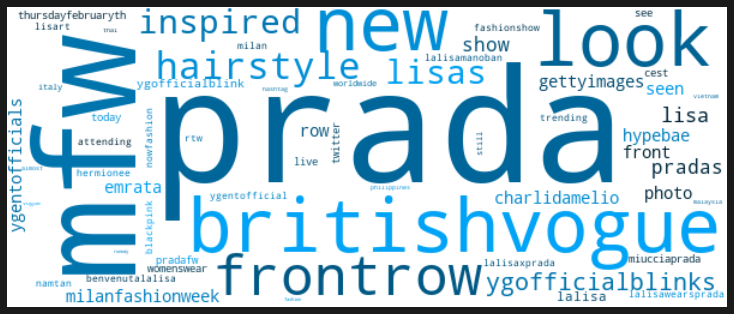

In [16]:
def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(200,100%%, %d%%)" % np.random.randint(10,51))

f = plt.figure( figsize=(10,10), facecolor='k')
plt.imshow(prada_wc.recolor(color_func = grey_color_func), interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig("prada_blackpink/most_frequent_words_prada.png", bbox_inches='tight')
plt.show()

# Let's repeat the analysis of the mentions for BLACKPINK

In [17]:
bp_path = 'Twitter_Bins/Blackpink_mentions.csv'
bp_dataset = pd.read_csv(bp_path,encoding='utf-8')
bp_dataset

,tweet_id,user_from_id,user_from_name,user_to_id,user_to_name,mention_type
0,1229193930094170112,941238934083837952,ttott08,462047280,Mayko45,retweet
1,1229193930094170112,941238934083837952,ttott08,878204370403250176,ygofficialblink,mention
2,1229194198902947842,1086151210913034240,camiorrr,462047280,Mayko45,retweet
3,1229194198902947842,1086151210913034240,camiorrr,878204370403250176,ygofficialblink,mention
4,1229194308676354048,967743829356044289,rafaeladigues,462047280,Mayko45,retweet
...,...,...,...,...,...,...
54099,1232440972874698752,1219885938307825664,m97378147,27844479,BritishVogue,retweet
54100,1232440972874698752,1219885938307825664,m97378147,878204370403250176,ygofficialblink,mention
54101,1232440972874698752,1219885938307825664,m97378147,1156866230,Prada,mention
54102,1232452844600475648,1120204511191060482,IhsabelleM,49616273,globaltimesnews,retweet


In [18]:
bp_dataset[bp_dataset['user_to_name']=='ygofficialblink'].count()

tweet_id          22792
user_from_id      22792
user_from_name    22792
user_to_id        22792
user_to_name      22792
mention_type      22792
dtype: int64

In [19]:
bp_dataset[bp_dataset['user_to_name']=='Prada'].count()

tweet_id          7432
user_from_id      7432
user_from_name    7432
user_to_id        7432
user_to_name      7432
mention_type      7432
dtype: int64

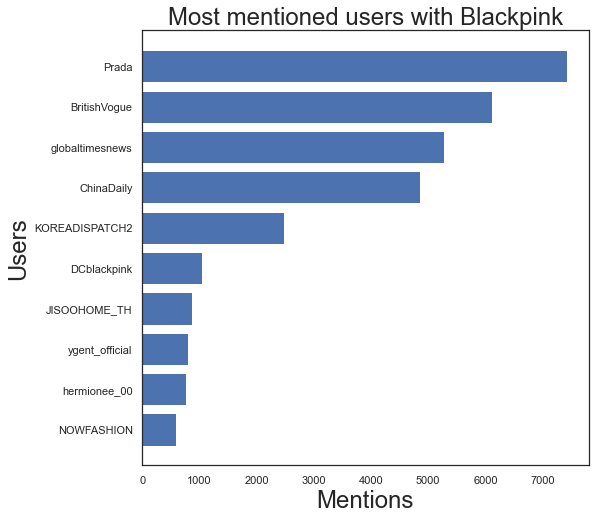

In [22]:
appearance_count = bp_dataset[bp_dataset['user_to_name']!='ygofficialblink']['user_to_name'].value_counts()[0:10]

fig = plt.figure(figsize=(8,8))
plt.barh(appearance_count.index, appearance_count, align='center')
plt.xlabel('Mentions')
plt.ylabel('Users')
plt.title('Most mentioned users with Blackpink')
plt.gca().invert_yaxis()
plt.savefig("prada_blackpink/most_comentioned_blackpink.png", bbox_inches='tight')

plt.show()

### We can try to understand if this correlation is given by some particular tweets being retweeted.

We will check the ID of the most frequent tweet, trying to understand how many times it has been retweeted, and if this has had a relevant influence in the correlation. 

It could also be possible to understand this to a deeper level, checking the most shared media (or URLs) in this set of tweets, trying to grasp the reason of such a correlation and more importantly a high volume of tweets. 

In [38]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
prada_text = prada_tweets['text'].value_counts()
le.fit(prada_text.index)
prada_text.index = le.transform(prada_text.index)
prada_text

122    6110
181    2778
155     958
145     598
188     537
       ... 
25        1
206       1
52        1
86        1
169       1
Name: text, Length: 236, dtype: int64

In [39]:
prada_text.index = le.inverse_transform(prada_text.index)
prada_text

RT @BritishVogue: .@ygofficialblink's Lisa’s @Prada front-row look at #MFW was inspired by her new hairstyle: https://t.co/fBGiheLTpm https://t.co/5YAvLnAjkj                                                             6110
RT @hypebae: .@ygent_official's Lisa, @emrata, @charlidamelio and more were seen front row at @Prada's FW20 show at #MilanFashionWeek.  https://t.co/yzgMHeonFd Photo: @GettyImages for @Prada https://t.co/MYIMZ2o8uP    2778
RT @Prada: See the #PradaFW20 Womenswear show by #MiucciaPrada live today, Thursday February 20th at 4pm CEST, on ⁣#Prada's ⁣#twitter. #mfw https://t.co/BkQSL2Yb6F                                                        958
RT @NOWFASHION: #LalisaManoban attending @prada #RTW #FW20 #FashionShow in #Milan - @ygofficialblink 💥 More on https://t.co/5DgLYhTPgW https://t.co/LzH5TaqeY4                                                             598
RT @namtan_327: โอ้โหหห ลิซลูก Lalisa (Lisa)😱😱😱 #LalisaWearsPrada #LALISAxPRADA @Prada #mfw #mfw2020 https:/

#### As expected, out of the 5 most retweeted tweets (amongst the ones mentioning Prada), 4 are about lalisa from BLACKPINK. It can also be seen how just the first two tweets have had over 8000 retweets, justifying the difference in volume (of about 10000 tweets) between Prada and the second most mentioned brand of MFW, Moschino. 